In [22]:
import pandas as pd

# Cargar el archivo pickle en un DataFrame
df_movies = pd.read_pickle('../Datasets/Datasets_cleaned_ETL/movi_cleaned/df_movies.pkl')


In [23]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   movieId        22998 non-null  object        
 1   plataforma     22998 non-null  category      
 2   type           22998 non-null  category      
 3   title          22998 non-null  object        
 4   director       22998 non-null  object        
 5   cast           22998 non-null  object        
 6   country        22998 non-null  object        
 7   date_added     22998 non-null  datetime64[ns]
 8   release_year   22998 non-null  int64         
 9   rating         22998 non-null  object        
 10  duration_int   22998 non-null  int64         
 11  duration_type  22998 non-null  object        
 12  listed_in      22998 non-null  category      
 13  description    22998 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(2), object(8)
memory usage: 2

In [24]:
df_movies.tail(5)

,movieId,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
22993,ns8803,netflix,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,158,min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
22994,ns8804,netflix,tv show,zombie dumb,unknown,unknown,unknown,2019-07-01,2018,tv-y7,2,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
22995,ns8805,netflix,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,88,min,"comedies, horror movies",looking to survive in a world taken over by zo...
22996,ns8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,88,min,"children & family movies, comedies","dragged from civilian life, a former superhero..."
22997,ns8807,netflix,movie,zubaan,mozez singh,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,2019-03-02,2015,tv-14,111,min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...


________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [25]:
# Cargar el archivo pickle en un DataFrame
df_gby_movieid = pd.read_pickle('../Datasets/Datasets_cleaned_ETL/ratings_cleaned/df_ratings_gby_movies.pkl')


In [26]:
df_gby_movieid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      22998 non-null  object 
 1   userId       22998 non-null  object 
 2   rating       22998 non-null  object 
 3   prom_rating  22998 non-null  float64
dtypes: float64(1), object(3)
memory usage: 718.8+ KB


In [27]:
df_gby_movieid.tail(5)

,movieId,userId,rating,prom_rating
22993,ns995,"108610, 108927, 108965, 109074, 109229, 109433...","3.0, 5.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.5, 3.0, 3...",3.436508
22994,ns996,"108423, 108739, 108757, 108804, 109041, 109197...","2.0, 3.0, 4.0, 3.0, 4.0, 4.5, 4.0, 5.0, 4.0, 2...",3.615942
22995,ns997,"109016, 109414, 109519, 109709, 110150, 110224...","4.0, 3.5, 3.5, 3.5, 4.0, 4.5, 4.0, 4.5, 1.0, 3...",3.655738
22996,ns998,"109112, 109478, 109943, 110052, 110183, 110487...","4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 0.5, 4.0, 3.0, 5...",3.541096
22997,ns999,"108560, 108933, 109539, 109873, 110269, 110487...","4.0, 4.0, 4.0, 5.0, 2.0, 4.0, 1.5, 2.5, 2.0, 5...",3.578571


# Ahora hago join de ambos por movie id:

In [28]:
# Realizar el inner join
df_merged = df_movies.merge(df_gby_movieid, on='movieId', how='inner')


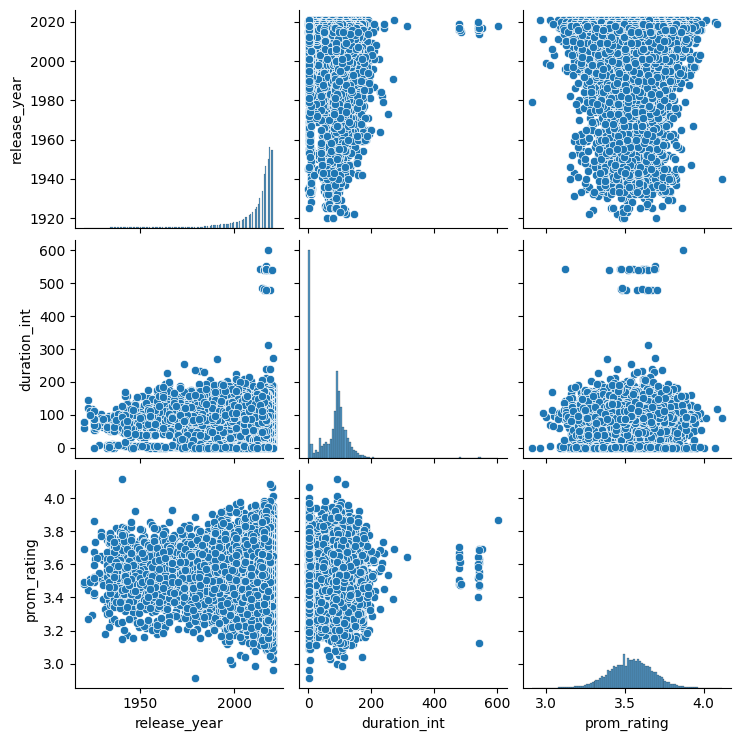

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear pairplot
sns.pairplot(df_merged)

# Mostrar el gráfico
plt.show()


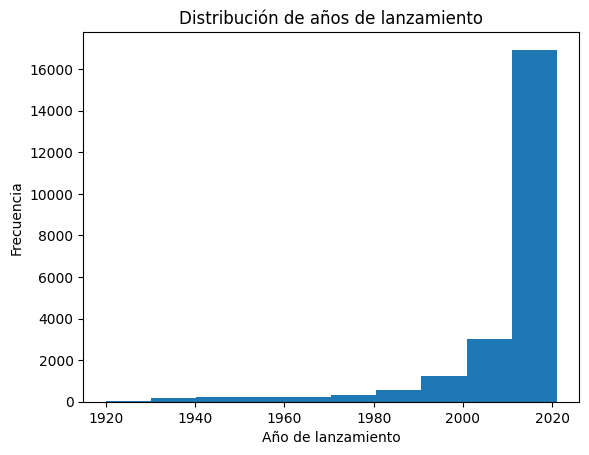

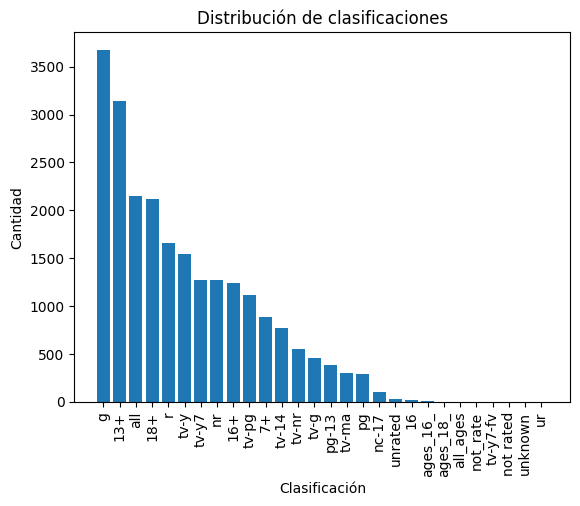

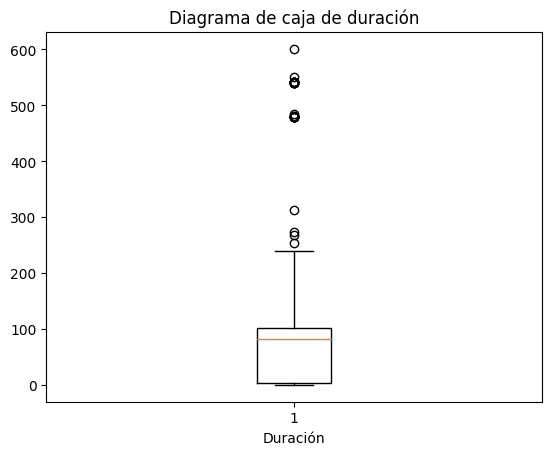

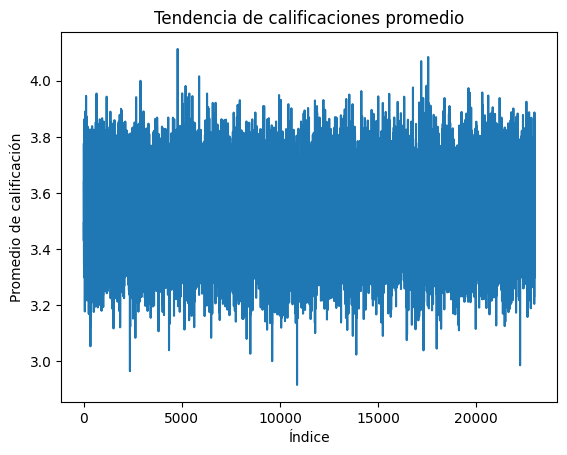

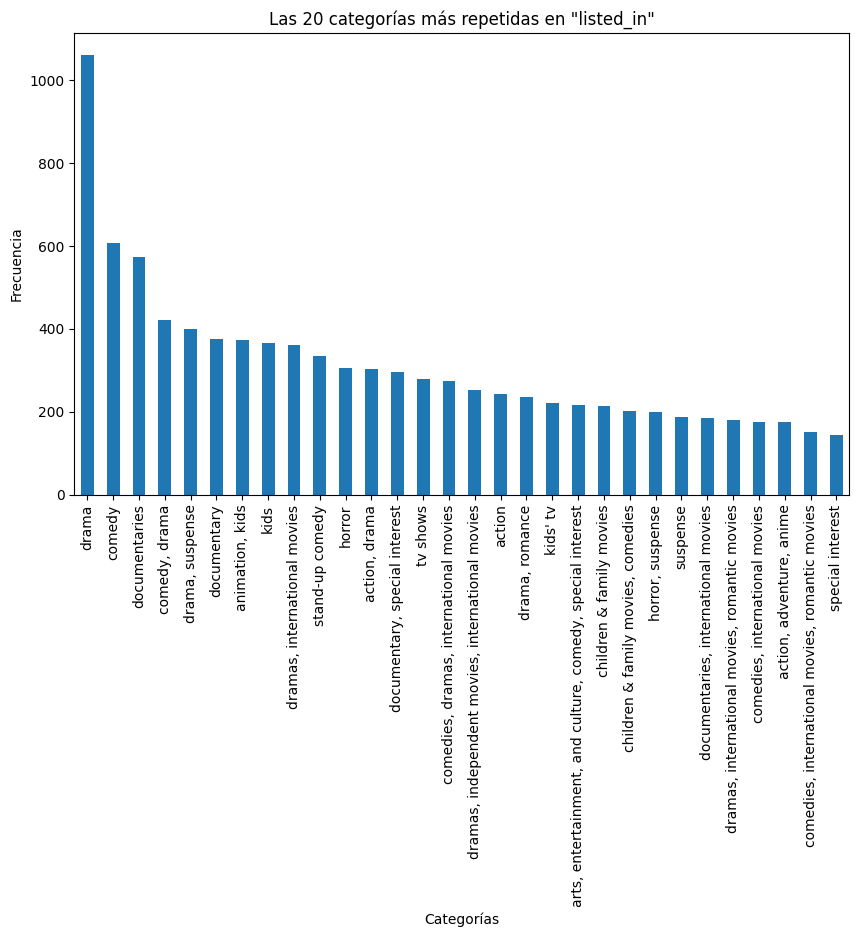

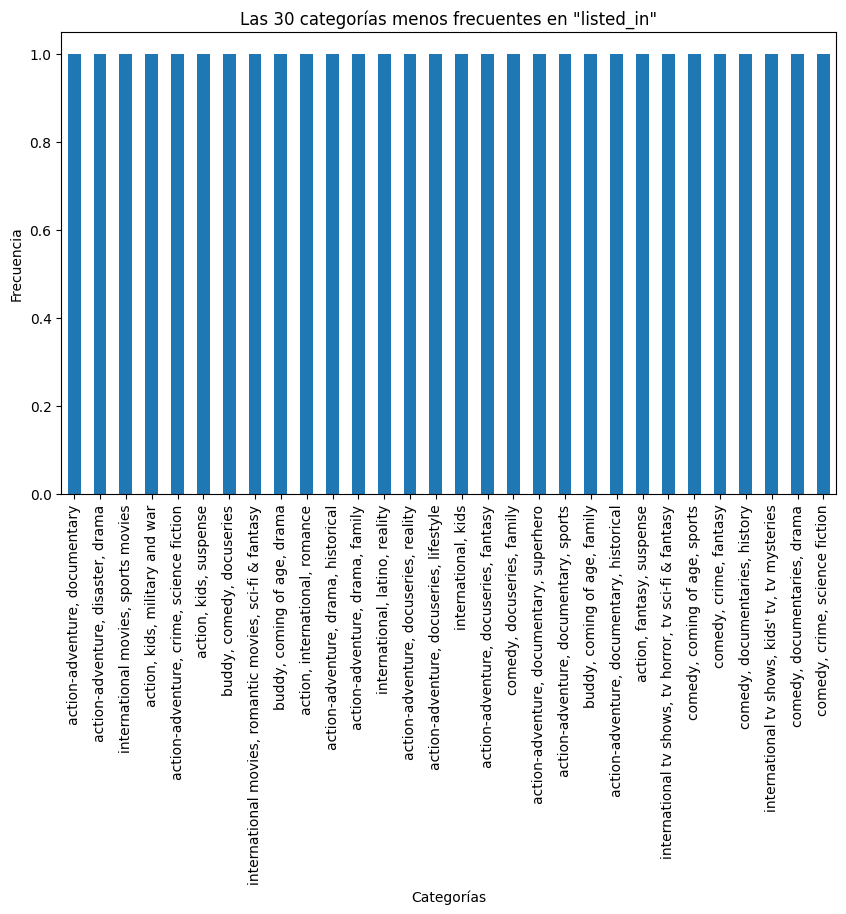

In [30]:
import matplotlib.pyplot as plt

# Gráfico para la columna 'release_year'
plt.hist(df_merged['release_year'], bins=10)  # Histograma
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de años de lanzamiento')
plt.show()

# Gráfico para la columna 'rating_x'
plt.bar(df_merged['rating_x'].unique(), df_merged['rating_x'].value_counts())
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.title('Distribución de clasificaciones')
plt.show()

# Gráfico para la columna 'duration_int'
plt.boxplot(df_merged['duration_int'])
plt.xlabel('Duración')
plt.title('Diagrama de caja de duración')
plt.show()

# Gráfico para la columna 'prom_rating'
plt.plot(df_merged['prom_rating'])
plt.xlabel('Índice')
plt.ylabel('Promedio de calificación')
plt.title('Tendencia de calificaciones promedio')
plt.show()


# Obtener las 20 categorías más repetidas
top_categories = df_merged['listed_in'].value_counts().nlargest(30)

# Graficar las 20 categorías más repetidas
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Las 20 categorías más repetidas en "listed_in"')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Obtener las 30 categorías menos frecuentes
bottom_categories = df_merged['listed_in'].value_counts().nsmallest(30)

# Graficar las 30 categorías menos frecuentes
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind='bar')
plt.title('Las 30 categorías menos frecuentes en "listed_in"')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [31]:
import pandas as pd

# Obtener columnas separadas para cada categoría de "listed_in"
categories = df_merged['listed_in'].str.get_dummies(sep=', ')

# Concatenar las columnas separadas al DataFrame original
df_merged = pd.concat([df_merged, categories], axis=1)


In [32]:
print(list(df_merged.columns)[:18])

['movieId', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating_x', 'duration_int', 'duration_type', 'listed_in', 'description', 'userId', 'rating_y', 'prom_rating', 'action']


In [33]:
pd.set_option('display.max_columns', None)

In [34]:
df_merged.head(5)

,movieId,plataforma,type,title,director,cast,country,date_added,release_year,rating_x,duration_int,duration_type,listed_in,description,userId,rating_y,prom_rating,action,action & adventure,action-adventure,adult animation,adventure,and culture,animals & nature,animation,anime,anime features,anime series,anthology,arthouse,arts,biographical,black stories,british tv shows,buddy,cartoons,children & family movies,classic & cult tv,classic movies,classics,comedies,comedy,coming of age,concert film,cooking & food,crime,crime tv shows,cult movies,dance,disaster,documentaries,documentary,docuseries,drama,dramas,entertainment,faith & spirituality,faith and spirituality,family,fantasy,fitness,game show / competition,game shows,health & wellness,historical,history,horror,horror movies,independent movies,international,international movies,international tv shows,kids,kids' tv,korean tv shows,late night,latino,lgbtq,lgbtq movies,lgbtq+,lifestyle,lifestyle & culture,medical,military and war,movies,music,music & musicals,music videos and concerts,musical,mystery,news,parody,police/cop,reality,reality tv,romance,romantic comedy,romantic movies,romantic tv shows,sci-fi & fantasy,science & nature tv,science & technology,science fiction,series,sitcom,sketch comedy,soap opera / melodrama,spanish-language tv shows,special interest,sports,sports movies,spy/espionage,stand up,stand-up comedy,stand-up comedy & talk shows,superhero,survival,suspense,talk show,talk show and variety,teen,teen tv shows,thriller,thrillers,travel,tv action & adventure,tv comedies,tv dramas,tv horror,tv mysteries,tv sci-fi & fantasy,tv shows,tv thrillers,unscripted,variety,western,young adult audience
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,"108725, 109037, 109317, 109585, 109603, 109710...","2.0, 4.0, 4.0, 4.0, 4.5, 4.0, 2.5, 4.0, 3.5, 4...",3.492754,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,"108580, 109147, 109930, 111147, 111496, 111546...","3.5, 3.5, 3.0, 3.0, 4.0, 3.5, 3.0, 5.0, 4.0, 4...",3.429688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,"109148, 109793, 109841, 110207, 110697, 110907...","5.0, 4.0, 4.0, 4.5, 4.5, 5.0, 4.5, 1.0, 4.5, 5...",3.776786,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ...","108862, 108879, 108881, 109143, 109720, 109788...","3.0, 3.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 3.0, 5...",3.727273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, 

In [35]:
df_merged.iloc[:, 17:] = df_merged.iloc[:, 17:].mul(df_merged['prom_rating'], axis=0) # multiplico el puntage promedio de la peli x su binario que dice el topic para tener una idea de que tan buena resulta como topic drama por ej.


In [36]:
prom_rating_column = df_merged.pop('prom_rating')
df_merged['prom_rating'] = prom_rating_column


C:\Users\Luca\AppData\Local\Temp\ipykernel_13896\3318037314.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['prom_rating'] = prom_rating_column


In [37]:
df_merged.head(5)

,movieId,plataforma,type,title,director,cast,country,date_added,release_year,rating_x,duration_int,duration_type,listed_in,description,userId,rating_y,action,action & adventure,action-adventure,adult animation,adventure,and culture,animals & nature,animation,anime,anime features,anime series,anthology,arthouse,arts,biographical,black stories,british tv shows,buddy,cartoons,children & family movies,classic & cult tv,classic movies,classics,comedies,comedy,coming of age,concert film,cooking & food,crime,crime tv shows,cult movies,dance,disaster,documentaries,documentary,docuseries,drama,dramas,entertainment,faith & spirituality,faith and spirituality,family,fantasy,fitness,game show / competition,game shows,health & wellness,historical,history,horror,horror movies,independent movies,international,international movies,international tv shows,kids,kids' tv,korean tv shows,late night,latino,lgbtq,lgbtq movies,lgbtq+,lifestyle,lifestyle & culture,medical,military and war,movies,music,music & musicals,music videos and concerts,musical,mystery,news,parody,police/cop,reality,reality tv,romance,romantic comedy,romantic movies,romantic tv shows,sci-fi & fantasy,science & nature tv,science & technology,science fiction,series,sitcom,sketch comedy,soap opera / melodrama,spanish-language tv shows,special interest,sports,sports movies,spy/espionage,stand up,stand-up comedy,stand-up comedy & talk shows,superhero,survival,suspense,talk show,talk show and variety,teen,teen tv shows,thriller,thrillers,travel,tv action & adventure,tv comedies,tv dramas,tv horror,tv mysteries,tv sci-fi & fantasy,tv shows,tv thrillers,unscripted,variety,western,young adult audience,prom_rating
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,"108725, 109037, 109317, 109585, 109603, 109710...","2.0, 4.0, 4.0, 4.0, 4.5, 4.0, 2.5, 4.0, 3.5, 4...",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.492754,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.492754
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,"108580, 109147, 109930, 111147, 111496, 111546...","3.5, 3.5, 3.0, 3.0, 4.0, 3.5, 3.0, 5.0, 4.0, 4...",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.429688,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.429688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.429688
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,"109148, 109793, 109841, 110207, 110697, 110907...","5.0, 4.0, 4.0, 4.5, 4.5, 5.0, 4.5, 1.0, 4.5, 5...",3.776786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.776786,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:

import os

# Ruta del archivo pickle
pickle_file = '../Datasets/Datasets_cleaned_ETL/Combinado_merged_movies_ratings/df_merged.pkl'

# Verificar si el archivo existe
if os.path.exists(pickle_file):
    # Eliminar el archivo existente
    os.remove(pickle_file)

# Guardar el dataframe como archivo pickle
df_merged.to_pickle(pickle_file)


# hasta aqu´he utilizado listed in con un get dumies, continuo haciendo lo mismo con user id y la valorizacion que le dio el user


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [39]:
# import pandas as pd

# # Obtener columnas separadas para cada categoría de "listed_in"
# user = df_merged['userId'].str.get_dummies(sep=', ') 

# # Concatenar las columnas separadas al DataFrame original
# df_merged = pd.concat([df_merged, user], axis=1)

In [40]:
# df_merged['108444'].sum()

In [41]:
# import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity

# # Obtener columnas separadas para cada categoría de "listed_in"
# user = df_merged['userId'].apply(lambda x: pd.Series(x)).fillna(0)

# # Concatenar las columnas separadas al DataFrame original
# df_merged = pd.concat([df_merged, user], axis=1)

# # Obtener los vectores de características de las películas
# feature_vectors = df_merged.iloc[:, 14:].values

# # Calcular la similitud del coseno entre las películas
# similarity_matrix = cosine_similarity(feature_vectors)

# # Obtener el índice de la película de referencia
# index_reference_movie = df_merged[df_merged['title'] == 'lionheart'].index[0]

# # Obtener las similitudes de la película de referencia con las demás películas
# similarity_scores = similarity_matrix[index_reference_movie]

# # Obtener los índices de las 20 películas más similares
# top_movie_indices = similarity_scores.argsort()[-21:-1]

# # Obtener el DataFrame con las 20 películas más similares
# recommended_movies = df_merged.iloc[top_movie_indices]

# # Imprimir el listado de películas recomendadas
# print(recommended_movies['title'])


In [42]:
# prom_rating_column = df_merged.pop('prom_rating')
# df_merged['prom_rating'] = prom_rating_column

# df_merged.head(3)

# aca dejo clavado, necestito una matriz de usuarios y votacion anexada a este hermoso df que estoy trabajando

__________________________________________________________________________________________________________________________________________________________________________________

# tengo que hacer lo mismo que hice con los topis ahora con los usuarios que han votado y con que puntuacion han votado
